In [1]:
from pathlib import Path

In [2]:
repo_dir = Path.cwd().parents[0]
repo_dir

PosixPath('/workspaces/heart-disease')

In [3]:
import sys

sys.path.insert(0, f"{repo_dir}")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import heart_disease.constants as hdc
import heart_disease.data.get_dataset as hddgd

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load data

In [5]:
hddgd.get_dataset()
combined_df = hddgd.validate_and_combine_dataset()

Data files already downloaded.


In [6]:
combined_df.target.value_counts()

target
1    509
0    411
Name: count, dtype: int64

# Bar plot

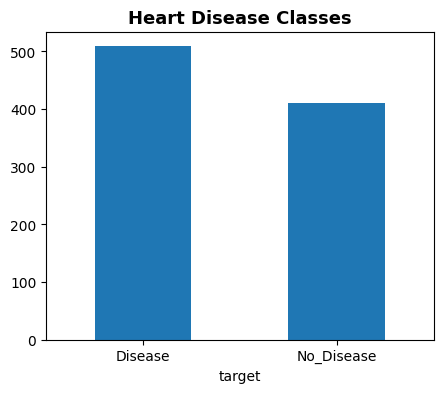

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))

ax = combined_df["target"].value_counts().plot(kind="bar")
ax.set_title("Heart Disease Classes", fontsize=13, weight="bold")
ax.set_xticklabels(["Disease", "No_Disease"], rotation=0);

## Box plot with subplots

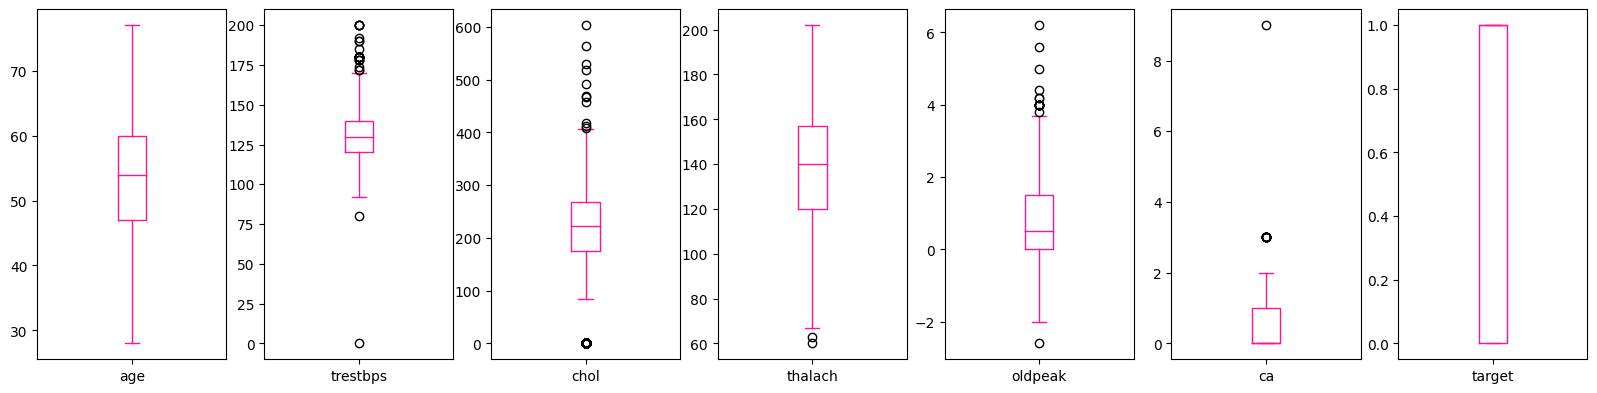

In [8]:
combined_df.plot(
    kind="box",
    subplots=True,
    layout=(2, 7),
    sharex=False,
    sharey=False,
    figsize=(20, 10),
    color="deeppink",
);

## Bar plot with text

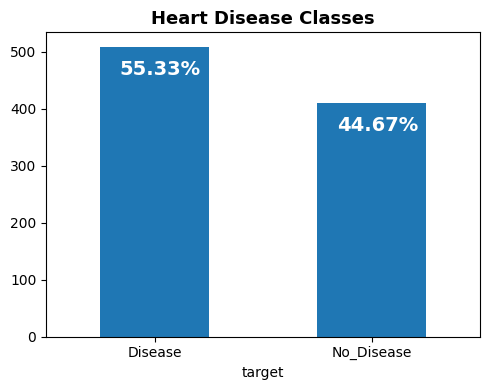

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))

ax = combined_df["target"].value_counts().plot(kind="bar")
ax.set_title("Heart Disease Classes", fontsize=13, weight="bold")
ax.set_xticklabels(["Disease", "No_Disease"], rotation=0)

total = sum((i.get_height() for i in ax.patches))

for i in ax.patches:
    ax.text(
        i.get_x() + 0.09,
        i.get_height() - 50,
        str(round((i.get_height() / total) * 100, 2)) + "%",
        fontsize=14,
        color="white",
        weight="bold",
    )

plt.tight_layout();

# Grid plot

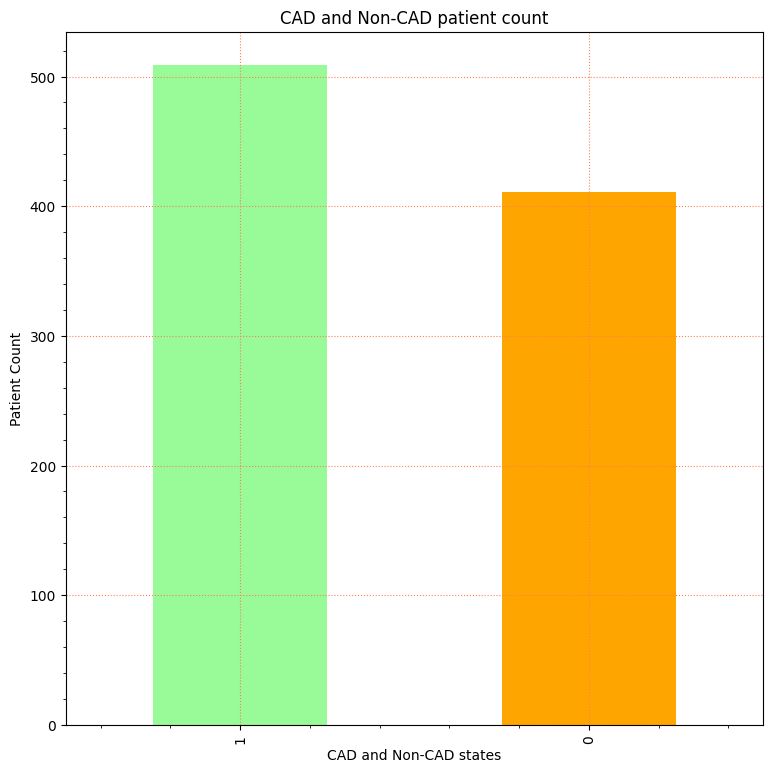

In [ ]:
combined_df["target"].value_counts().plot(
    kind="bar", figsize=(9, 9), color=["palegreen", "orange"]
)
plt.minorticks_on()
plt.grid(which="major", color="coral", linestyle=":")
plt.xlabel("CAD and Non-CAD states")
plt.ylabel("Patient Count")
plt.title("CAD and Non-CAD patient count");

# Histogram

## Histogram with density

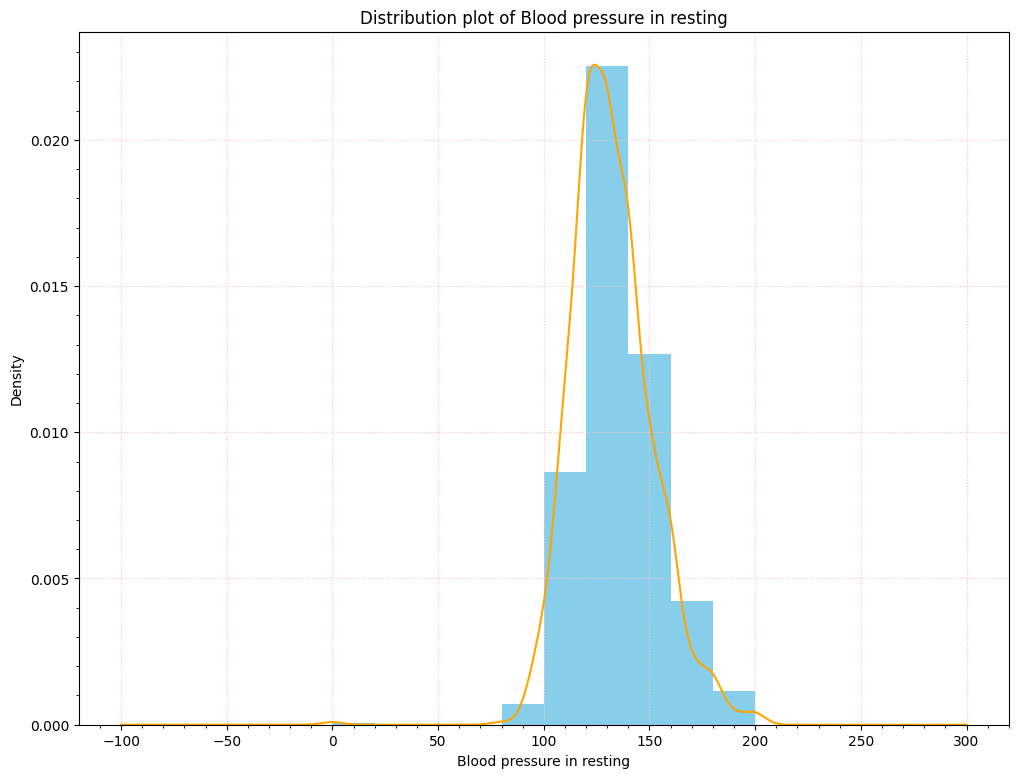

In [23]:
ax = combined_df["trestbps"].plot(
    kind="hist", density=True, figsize=(12, 9), color="skyblue"
)
combined_df["trestbps"].plot(kind="density", color="orange", ax=ax)
plt.minorticks_on()
plt.grid(which="major", color="pink", linestyle=":")
plt.xlabel("Blood pressure in resting")
plt.ylabel("Density")
plt.title("Distribution plot of Blood pressure in resting");

# Skew and kurtosis

In [11]:
skew = {}
kurt = {}
for col in combined_df.select_dtypes(np.number).columns:
    skew[col] = combined_df[col].skew()
    kurt[col] = combined_df[col].kurt()

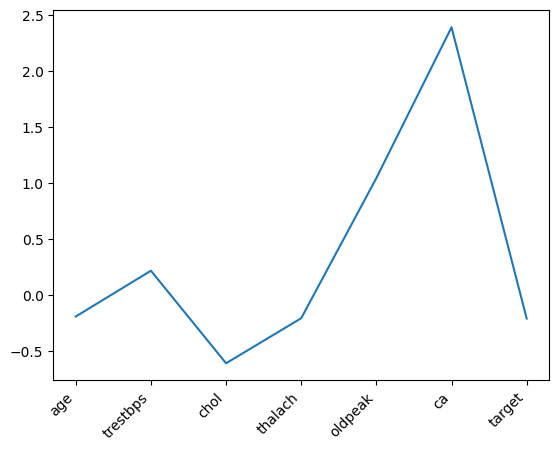

In [15]:
plt.plot(skew.keys(), skew.values())
plt.xticks(rotation=45, horizontalalignment="right")
plt.show();